9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

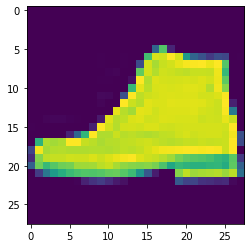

In [3]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#Loading the dataset 
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Plotting the images
plt.imshow(train_images[42])
print(train_labels[42])

print(train_images[42])

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6202 - accuracy: 0.7850
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3799 - accuracy: 0.8639

Reached 60% accuracy so cancelling training!
prediction [[7.3108372e-06 8.2841962e-07 1.0804079e-05 4.0599302e-06 6.7958495e-06
  2.1316905e-02 1.9729776e-05 2.8396327e-02 4.1758438e-04 9.4981968e-01]]
label 9
313/313 [==============================] - 0s 933us/step - loss: 0.3975 - accuracy: 0.8603
evaluation [0.3975386321544647, 0.8603000044822693]


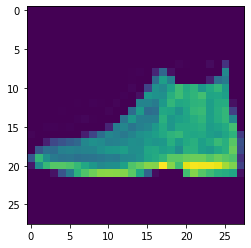

In [4]:
import numpy as np

#Callback function for stopping the training 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

#Normalization
train_images  = train_images / 255.0
test_images = test_images / 255.0

callbacks = myCallback()

#Model
#Input image size 28 x 28, 10 classes of clothing in the dataset
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


#fit the model
model.fit(train_images, train_labels, epochs=15, callbacks=[callbacks])

#print a prediction 
print('prediction', model.predict(np.expand_dims(test_images[0], axis=0)))

#showing the image
plt.imshow(test_images[0])
print('label', test_labels[0])

#Evaluating the model
print('evaluation', model.evaluate(test_images, test_labels))
